*First compiled on May 23, 2017.*

### Mireya and Jordi's Planaria data

In [4]:
adata_seurat = sc.read('./data/old/X_pca_seurat.txt')
smp_names_clusters = np.genfromtxt('./data/old/cell.identity.txt', delimiter='\t', dtype=str)
adata_seurat.smp_names = smp_names_clusters[:, 0]
adata_seurat.smp['clusters'] = smp_names_clusters[:, 1]
sc.tl.tsne(adata_seurat)
sc.tl.diffmap(adata_seurat)
sc.write('planaria_seurat_old', adata_seurat)

... reading file ./write/data/old/X_pca_seurat.h5
compute tSNE
... computing tSNE directly from X
... using MulticoreTSNE
finished (0:00:29.878) and added
    "X_tsne", the tSNE coordinates for X (adata.smp)
initializing data graph
... using X for building graph
compute Diffusion Map with 10 components
... determined k = 30 nearest neighbors of each point (0:00:01.614)
... computed W (weight matrix) with "knn" = True (0:00:04.671)
... computed K (anisotropic kernel) (0:00:00.062)
... computed Ktilde (normalized anistropic kernel)
... computed eigenvalues (0:00:00.264)
[ 1.     0.994  0.993  0.992  0.992  0.992  0.991  0.989  0.986  0.985]
finished (0:00:00.255) and added
    the data representation "X_diffmap" (adata.smp),
    the eigen values of the transition matrix "diffmap_evals" (adata.add)
... writing ./write/planaria_seurat_old.h5


... updating the color palette to provide enough colors


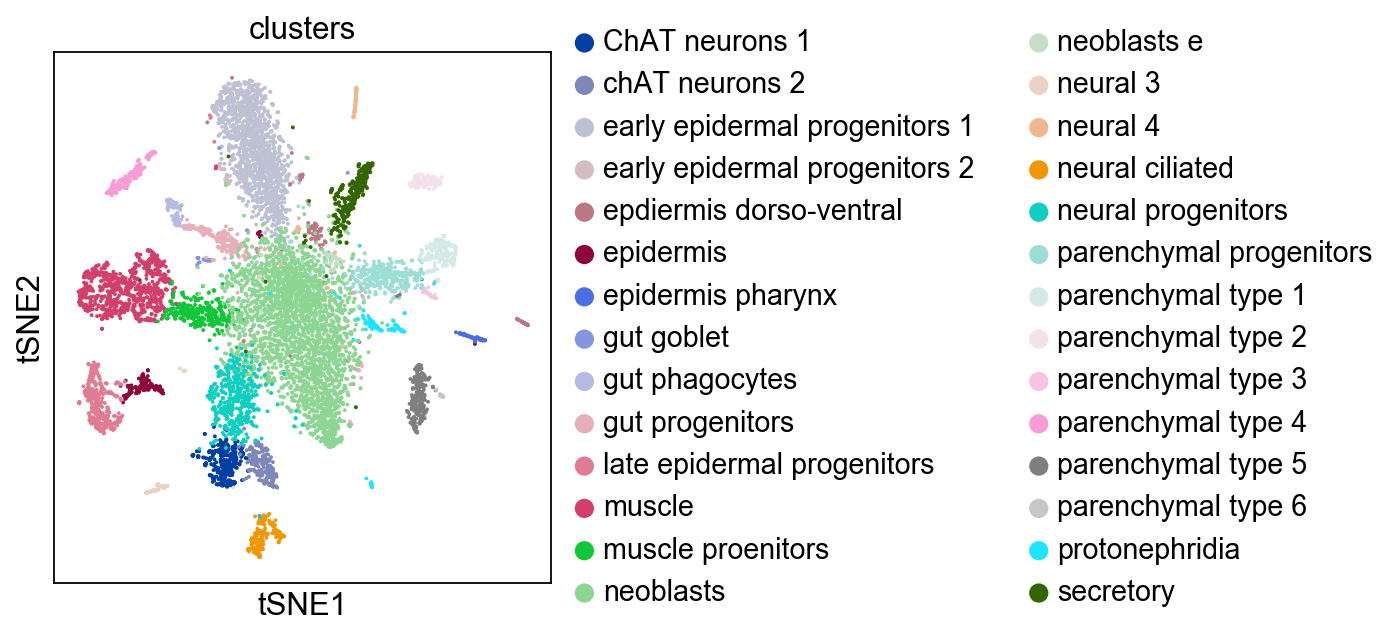

In [5]:
axs = sc.pl.tsne(adata_seurat, color='clusters')

## Lineage-tree construction

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import scanpy.api as sc
sc.logging.print_version_and_date()
sc.settings.verbosity = 0
sc.settings.savefigs = False
adata = sc.read('planaria_seurat_old')

Running Scanpy version 0.1+110.g34f6571 on 2017-07-14 16:59.


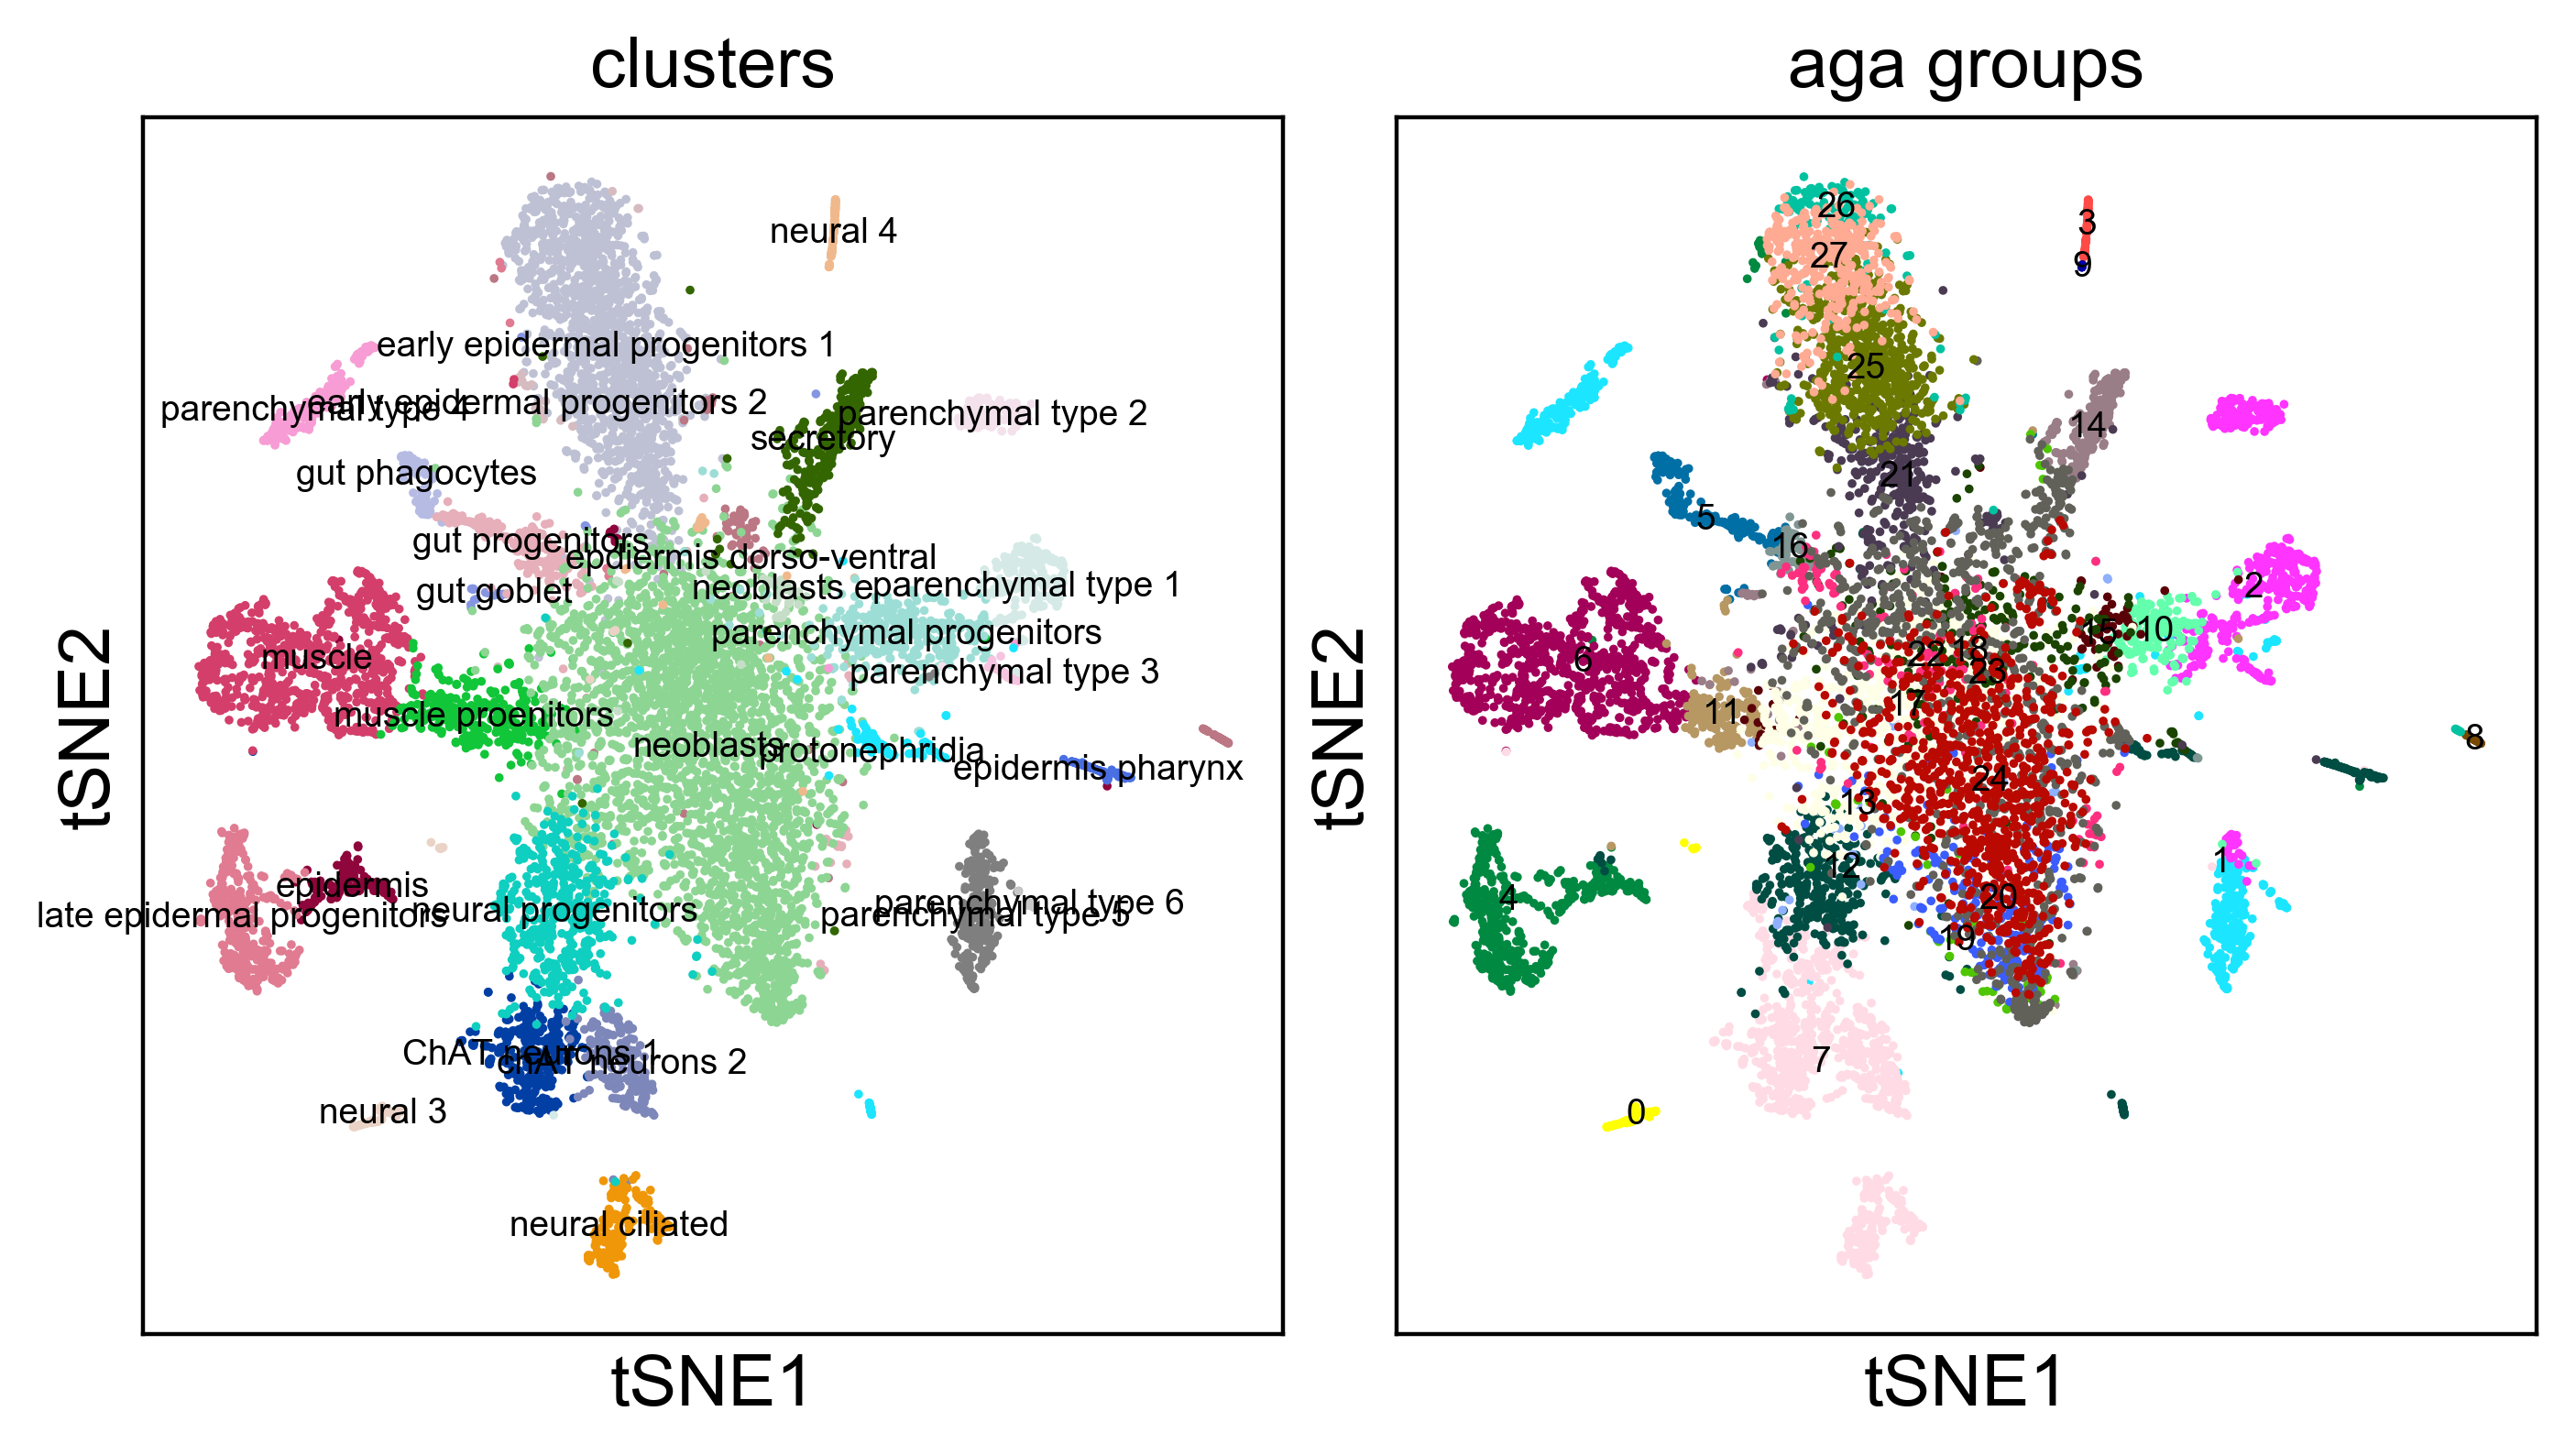

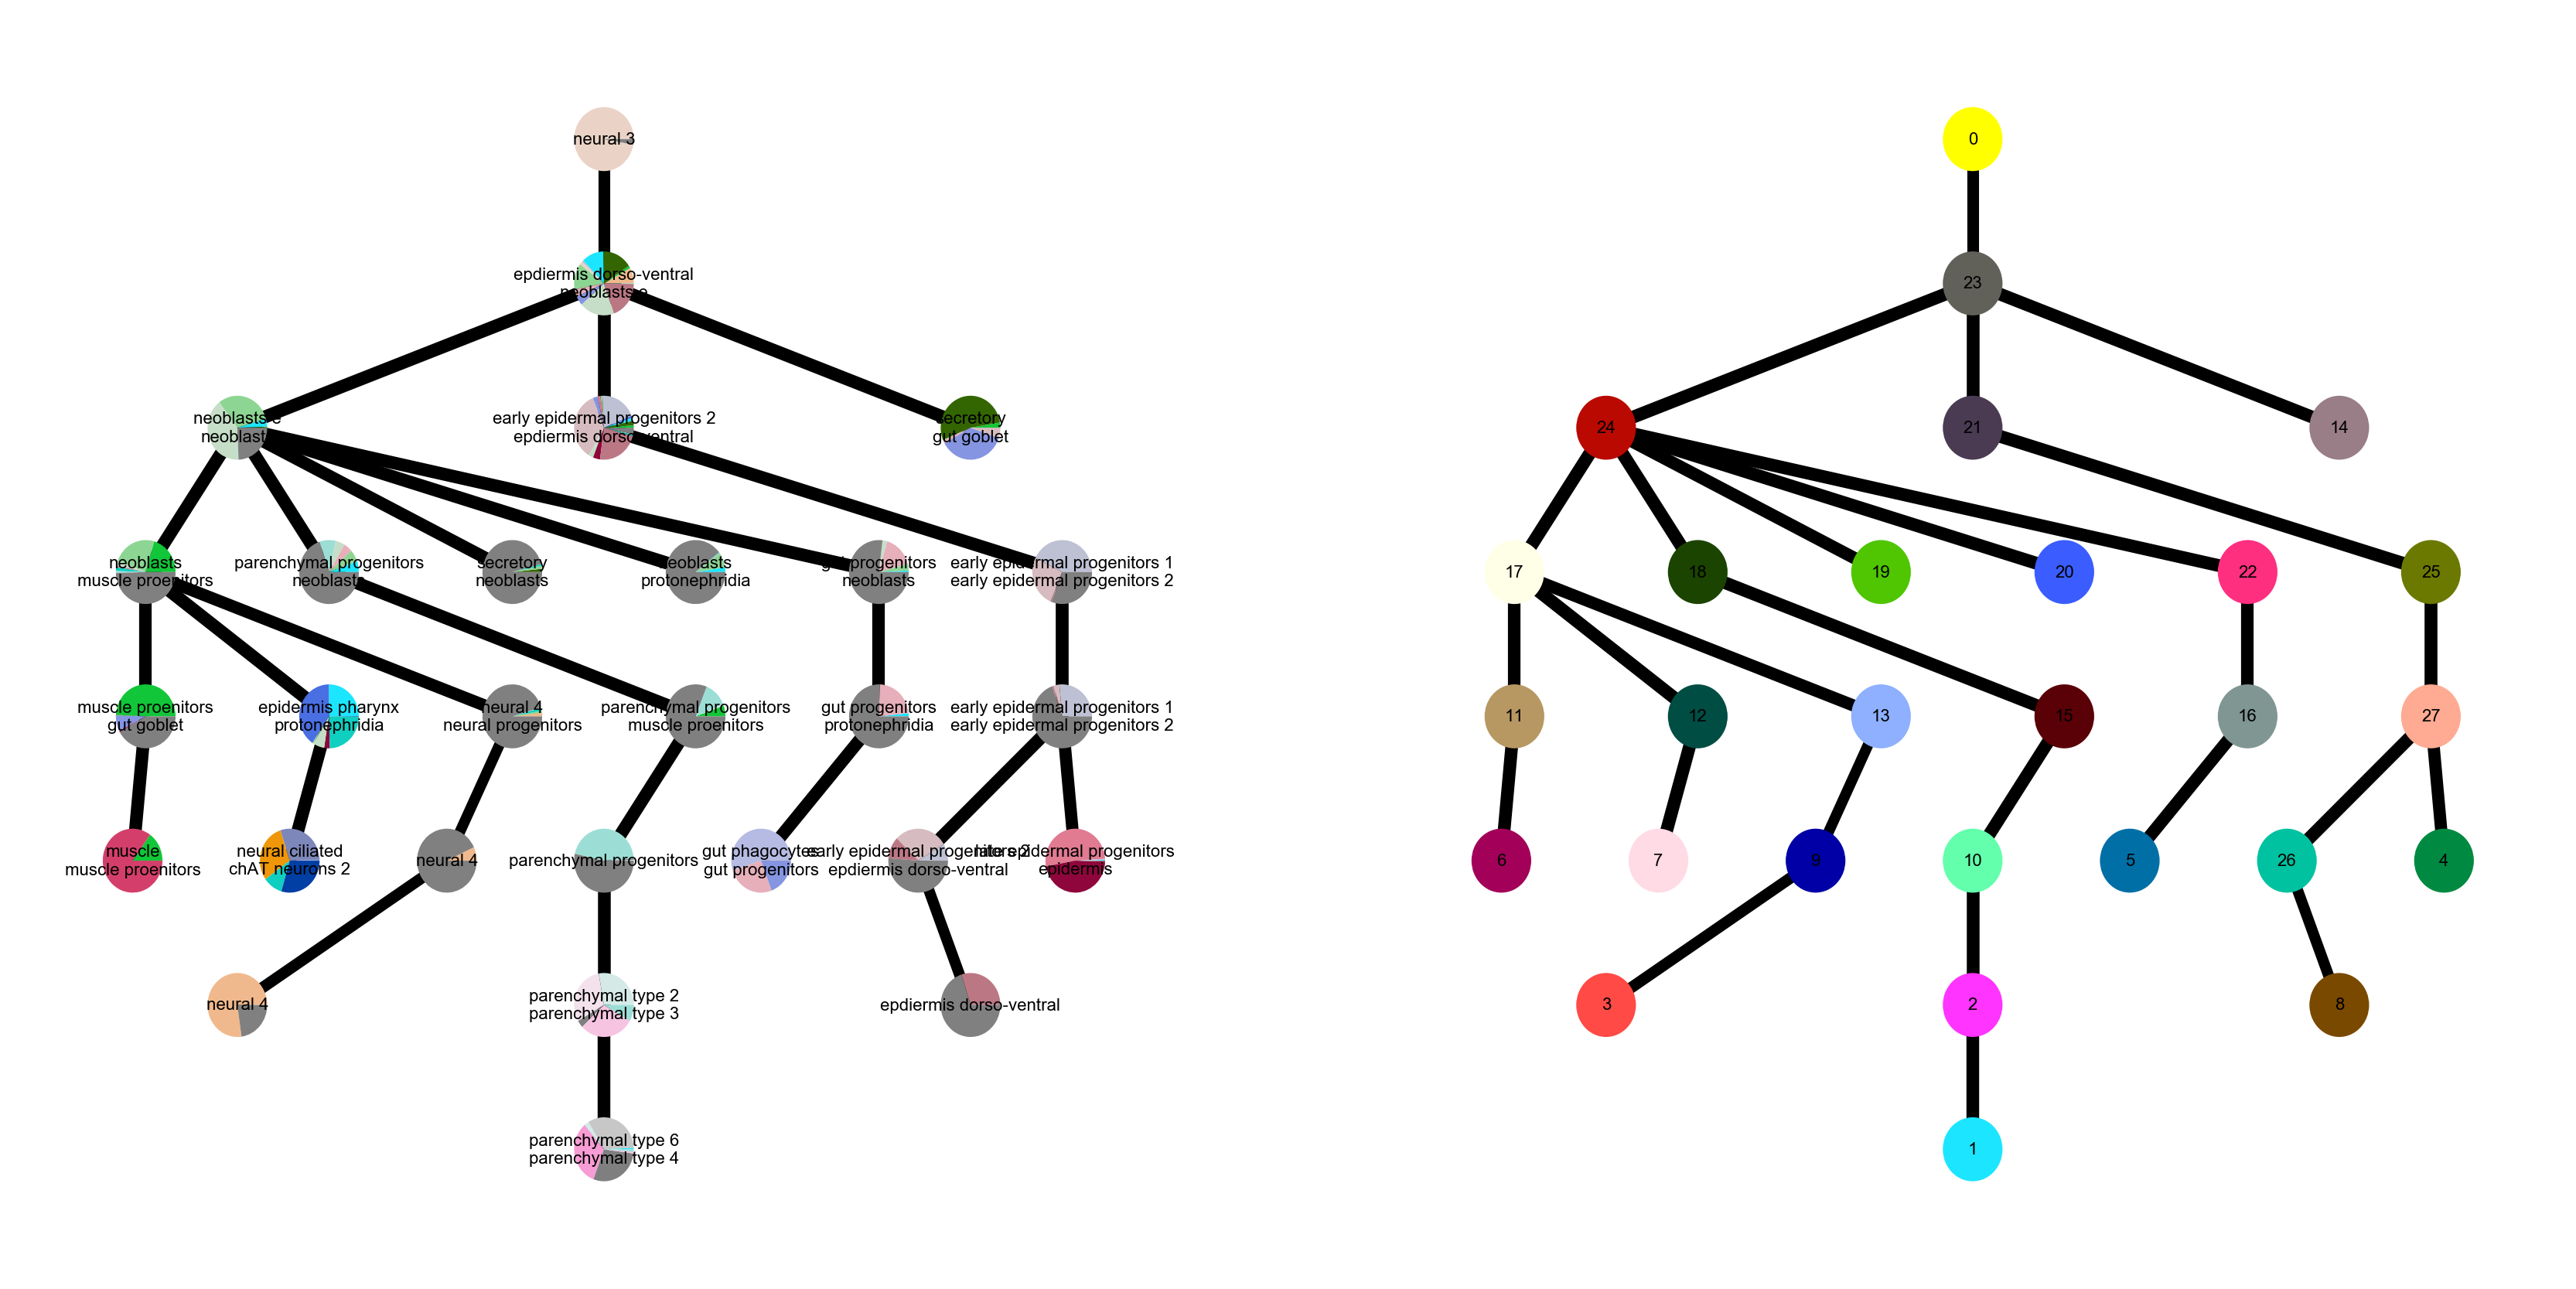

In [3]:
sc.tl.aga(adata, node_groups='hierarch', n_nodes=28,
          attachedness_measure='connectedness')
sc.pl.tsne(adata, color=['clusters', 'aga_groups'],
           pal=[sc.pl.utils.pal_26, sc.pl.utils.pal_64],
           legend_loc='on data', legend_fontsize=7)
asso_names, asso_matrix = sc.utils.identify_categories(
   adata, prediction='aga_groups', reference='clusters', max_n_names=2)
asso_colors = sc.utils.get_associated_colors(
    sc.pl.utils.pal_26, asso_matrix)
ax = sc.pl.aga_tree(adata, root=0,
                    colors=[asso_colors, sc.pl.utils.pal_64],
                    names=[asso_names, list(range(len(asso_names)))],
                    fontsize=4, show=True)